# Amazon Product Recommendation

## Problem Statement:
* Build your own recommendation system for products on an e-commerce website like Amazon.com.

## Dataset Description:

### Source -
* Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/)
* The repository has several datasets. For this case study, we are using the Electronics dataset.

### Dataset Link -
* https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing

### Dataset columns - 
* First three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

In [1]:
import os 
print(os.getcwd())

C:\Users\Venkatesh K Govindan\PGP-AIML\Project\Residency-6\Recommendation-Systems


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid', palette='spring', rc={'figure.figsize':(8,6)})

import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

## 1. Read and explore the given dataset. (Rename column/add headers, plot histograms, find data characteristics)

#### * Discarding timestamp column as it is not needed for this usecase.

In [3]:
colnames=['UserId', 'ProductId', 'Rating']

In [4]:
prod_ratings_df=pd.read_csv('ratings_Electronics.csv', names=colnames, usecols=[0, 1, 2])

In [5]:
prod_ratings_df.sample(10,random_state=1)

,UserId,ProductId,Rating
6887106,A9UYPR4Q055LZ,B00AFXUUV6,1.0
7089171,ACUWMWOHAFDXF,B00BFDHVAS,5.0
1257254,ADH0W9QWMJ8V7,B000OMKR8E,4.0
5628569,A1VDA4Z5EMT052,B0075SUG3Q,5.0
559923,ASYZVGMBYVY2Z,B0006B486K,2.0
3936059,AJHVJMH379SQF,B0047UNP3I,1.0
3911109,A1CDZ07YBEZP6C,B0046HNWO4,5.0
2866172,APRVK6PDTNH82,B002U8573K,3.0
2363824,A3KD4DEAEO2KRF,B001UZJBGI,5.0
5585273,A2CGKM93KATTY3,B00746LVOM,1.0


In [6]:
rows,columns=prod_ratings_df.shape
print('Number of rows in product dataset: ', rows)
print('Number of columns in product dataset: ', columns)

Number of rows in product dataset:  7824482
Number of columns in product dataset:  3


#### Validating for missing or NaN, incorrect data and duplicate data. 

In [7]:
df_duplicates_removed = prod_ratings_df.drop_duplicates(keep='first')
rows,columns=df_duplicates_removed.shape
print('Number of rows in product dataset: ', rows)
print('Number of columns in product dataset: ', columns)

Number of rows in product dataset:  7824482
Number of columns in product dataset:  3


#### * No duplicate data in the dataset.

In [8]:
prod_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
UserId       object
ProductId    object
Rating       float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


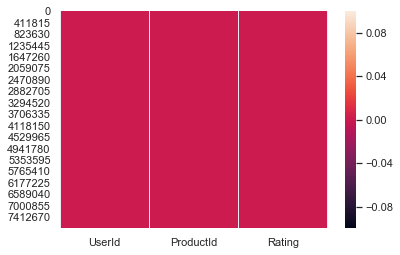

In [9]:
sns.heatmap(prod_ratings_df.isna())

In [10]:
prod_ratings_df.apply(lambda x : sum(x.isna()))

UserId       0
ProductId    0
Rating       0
dtype: int64

#### * There are no missing or NaN values.  

In [11]:
prod_ratings_df['UserId'].value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
A25C2M3QF9G7OQ    296
A22CW0ZHY3NJH8    292
A38RMU1Y5TDP9     282
A3EXWV8FNSSFL6    282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A12DQZKRKTNF5E    252
A231WM2Z2JL0U3    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A1T1YSCDW0PD25    227
                 ... 
APEZKE8WZICEZ       1
A2T6LOEKN9WGRZ      1
A1GP0QOUZWO30X      1
A32NKU60RZQ322      1
A3K3AKO4GUED8G      1
AAKWK3JN0WG27       1
A2ZAFUISUGTP3X      1
A1O262F13KJNYC      1
A3MWVOF5ENL7YW      1
A2Y81SWDPACINH      1
A3QLTSXSKZ4DUZ      1
A3AXRG3RS2R847      1
A3BLYE8R2ZAWTV      1
A61M5R3C63MDC       1
A1ABRMS9ND

In [12]:
prod_ratings_df['ProductId'].value_counts()

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
B008OHNZI0     8966
B003LR7ME6     8840
B000LRMS66     8715
B009SYZ8OC     8370
B00BGA9WK2     7561
B004QK7HI8     7060
B009A5204K     7059
B00BGGDVOO     6893
B0098F5W0Q     6616
B002MAPRYU     6599
B002WE6D44     6509
B005HMKKH4     6134
B0012S4APK     5642
B0052YFYFK     5521
B0001FTVEK     5345
B0044YU60M     5239
B00316263Y     5038
B000I68BD4     4903
B006ZP8UOW     4842
B0041Q38NU     4774
              ...  
B004N0FCX8        1
B00CYB9Q5I        1
B00C2M49VA        1
B0068AERWI        1
B009F2BZR6        1
B00A9MYA6E        1
B007MLUU64        1
B007I8VFB0        1
B000UD4N8M        1
B006Z8AAL0        1
B008MIMEYW        1
B002MGO2JK        1
B000E7A9ZK        1
B00IBIMTNO        1
B000CHOLO2        1
B00EMTC6AC        1
B003Y7QLPE        1
B003OXUPIC        1
B001DPHVMQ        1


In [13]:
prod_ratings_df['Rating'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Rating, dtype: int64

#### * There are no incorrect data in dataset.  

In [14]:
prod_ratings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


####  * Observe that more than 50% of data is for Rating 5.0

In [15]:
sorted(prod_ratings_df['Rating'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0]

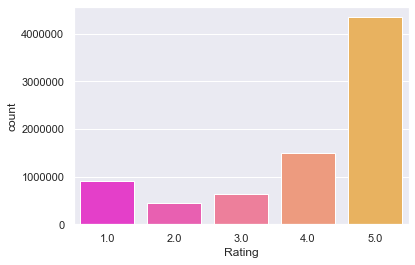

In [16]:
sns.countplot(prod_ratings_df['Rating'])

#### * Observe that more number (above 50%) of Users has given rating 5.

### EDA with PANDAS Profiling package option. (additionally, I tried along with above EDA for the input dataset).

In [17]:
import pandas_profiling as pp

In [18]:
pp.ProfileReport(prod_ratings_df)

Number of variables,3
Number of observations,7824482
Total Missing (%),0.0%
Total size in memory,179.1 MiB
Average record size in memory,24.0 B
Numeric,1
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [19]:
prod_ratings_df.sample(10, random_state=1)

,UserId,ProductId,Rating
6887106,A9UYPR4Q055LZ,B00AFXUUV6,1.0
7089171,ACUWMWOHAFDXF,B00BFDHVAS,5.0
1257254,ADH0W9QWMJ8V7,B000OMKR8E,4.0
5628569,A1VDA4Z5EMT052,B0075SUG3Q,5.0
559923,ASYZVGMBYVY2Z,B0006B486K,2.0
3936059,AJHVJMH379SQF,B0047UNP3I,1.0
3911109,A1CDZ07YBEZP6C,B0046HNWO4,5.0
2866172,APRVK6PDTNH82,B002U8573K,3.0
2363824,A3KD4DEAEO2KRF,B001UZJBGI,5.0
5585273,A2CGKM93KATTY3,B00746LVOM,1.0


In [20]:
user_ratings=prod_ratings_df.groupby('UserId').size().sort_values(ascending=False)

In [21]:
print('Top 10 users based on nimber of ratings: \n',user_ratings[:10])

Top 10 users based on nimber of ratings: 
 UserId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64


In [22]:
user_ratings[user_ratings.values>=50]

UserId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A31N0XY2UTB25C    227
                 ... 
A319Y83RT0MRVR     50
A21S26XYPGXJZX     50
A37PV5GMP2ILJC     50
AY4EXFOO43C3S      50
A1EOTB1WHLSW6G     50
A1C5TCCR2IGKBU     50
ANEDXRFDZDL18      50
A274X54O9CN2SR     50
A1USYP4AXF5I1D     50
A28CCQNXWV6WA2     50
ANEXFROORI6F6      50
A11KQADBYE0UZL     50
A2AFTRU43PY9P5     50
A1D27BCSYV7VWH     50
A3E

In [23]:
user_ratings[user_ratings.values>=50].index

Index(['A5JLAU2ARJ0BO', 'ADLVFFE4VBT8', 'A3OXHLG6DIBRW8', 'A6FIAB28IS79',
       'A680RUE1FDO8B', 'A1ODOGXEYECQQ8', 'A36K2N527TXXJN', 'A2AY4YUOX2N1BQ',
       'AWPODHOB4GFWL', 'A25C2M3QF9G7OQ',
       ...
       'A1VJ0V58N0698J', 'A2WDCAMKCCP1UR', 'A2ZGDHLJ85T6AD', 'A16RL0RMRF974O',
       'A1W4F91DH3XPB2', 'A2QAOP52OEB5EV', 'ACH055GTTIGC9', 'A2JRDFIGWTX50J',
       'AOTZOHB2LZGYR', 'A2RS66Y79Q8X0W'],
      dtype='object', name='UserId', length=1540)

In [24]:
user_ratings_df=prod_ratings_df[prod_ratings_df.UserId.isin(user_ratings[user_ratings.values>=50].index)]

In [25]:
user_ratings_df.groupby('UserId').size().sort_values(ascending=False)

UserId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A38RMU1Y5TDP9     282
A3EXWV8FNSSFL6    282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A31N0XY2UTB25C    227
                 ... 
A1USYP4AXF5I1D     50
A17RFKCYS69M3Y     50
A3SP7T2PZ3HSDE     50
A21S26XYPGXJZX     50
A3EP26M3QHINXT     50
AOTZOHB2LZGYR      50
A2WDCAMKCCP1UR     50
A3HC7NWLKCPX4X     50
A7Z2J9V37ABCO      50
A1VJ0V58N0698J     50
A2FZQF0MH29VYN     50
A3QD59N3M7O7KB     50
A3LSEIG2PIJYBL     50
A2QIC4G483SQQA     50
A20

In [26]:
user_ratings_df.sample(10, random_state=1)

,UserId,ProductId,Rating
1476088,A2CIQEY05SPHTZ,B000W9UYL4,2.0
3043226,A370XYLIZCSK1Y,B00347L6I6,5.0
3337660,ANTN61S4L7WG9,B003FMVPFY,5.0
2560304,A2HPJKM7L4EOQB,B002DW97WK,4.0
1725958,A1MRPX3RM48T2I,B0015HYPOO,4.0
1488647,A38NHXL5257E3B,B000WL6YY8,5.0
894507,A30C8WHQ2CYFO4,B000EXT5AY,4.0
7682922,APBDZ88BBTN4F,B00G6CLNCK,3.0
4976822,A3DWO5RJDA430F,B005HNNQ6U,5.0
5548016,AY3XPKRAMKKY7,B0071BTJPI,5.0


In [27]:
print(user_ratings_df[user_ratings_df['UserId']=='A2CIQEY05SPHTZ']['UserId'].count())
print(user_ratings_df[user_ratings_df['UserId']=='A370XYLIZCSK1Y']['UserId'].count())
print(user_ratings_df[user_ratings_df['UserId']=='ANTN61S4L7WG9']['UserId'].count())
print(user_ratings_df[user_ratings_df['UserId']=='A2HPJKM7L4EOQB']['UserId'].count())
print(user_ratings_df[user_ratings_df['UserId']=='A1MRPX3RM48T2I']['UserId'].count())
print(user_ratings_df[user_ratings_df['UserId']=='A38NHXL5257E3B']['UserId'].count())
print(user_ratings_df[user_ratings_df['UserId']=='A30C8WHQ2CYFO4']['UserId'].count())
print(user_ratings_df[user_ratings_df['UserId']=='APBDZ88BBTN4F']['UserId'].count())
print(user_ratings_df[user_ratings_df['UserId']=='A3DWO5RJDA430F']['UserId'].count())
print(user_ratings_df[user_ratings_df['UserId']=='AY3XPKRAMKKY7']['UserId'].count())
print(user_ratings_df[user_ratings_df['UserId']=='A5JLAU2ARJ0BO']['UserId'].count())     

69
108
66
75
131
94
52
60
146
55
520


In [28]:
print('Number of users who have rated 50 or more items =', len(user_ratings_df))
print('Number of unique users in the final data = ', user_ratings_df['UserId'].nunique())
print('Number of unique products in the final data = ', user_ratings_df['ProductId'].nunique())

Number of users who have rated 50 or more items = 125871
Number of unique users in the final data =  1540
Number of unique products in the final data =  48190


## 3. Build Popularity Recommender model.

#### Calculating product popularity based on 3a) weighted rating and 3b) Pandas ranking option using product mean rating and rating count. 

In [29]:
user_ratings_df.sample(10, random_state=1)

,UserId,ProductId,Rating
1476088,A2CIQEY05SPHTZ,B000W9UYL4,2.0
3043226,A370XYLIZCSK1Y,B00347L6I6,5.0
3337660,ANTN61S4L7WG9,B003FMVPFY,5.0
2560304,A2HPJKM7L4EOQB,B002DW97WK,4.0
1725958,A1MRPX3RM48T2I,B0015HYPOO,4.0
1488647,A38NHXL5257E3B,B000WL6YY8,5.0
894507,A30C8WHQ2CYFO4,B000EXT5AY,4.0
7682922,APBDZ88BBTN4F,B00G6CLNCK,3.0
4976822,A3DWO5RJDA430F,B005HNNQ6U,5.0
5548016,AY3XPKRAMKKY7,B0071BTJPI,5.0


#### *List of top 10 products based of top mean ratings

In [30]:
user_ratings_df.groupby('ProductId')['Rating'].mean().sort_values(ascending = False).head(10)

ProductId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
B002R0T03Y    5.0
B002R20X9M    5.0
B002R2KACC    5.0
B002R4NN92    5.0
B002R5ABIW    5.0
Name: Rating, dtype: float64

#### *List of top 10 products based on most number of rating counts

In [31]:
user_ratings_df.groupby('ProductId')['Rating'].count().sort_values(ascending=False).head(10)

ProductId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
B008DWCRQW    137
B00829THK0    137
B002R5AM7C    128
B004CLYEDC    118
B002SZEOLG    113
Name: Rating, dtype: int64

#### *Creating new dataframe with average rating and number of ratings counts to calculate weighted rating for each products.

In [32]:
ratings_df=pd.DataFrame(user_ratings_df.groupby('ProductId')['Rating'].mean())
ratings_df.sample(10, random_state=1)

,Rating
ProductId,
B004GHNQDQ,2.000000
B008CNXXM4,4.666667
B008BRHPW0,5.000000
B007RG2QNY,3.500000
B0034G4YQS,5.000000
B005LLO8J2,5.000000
B005FFVTC8,5.000000
B004H5C0WK,5.000000
B002ZNJB2S,3.000000


In [33]:
ratings_df['Rating_Count'] = pd.DataFrame(user_ratings_df.groupby('ProductId')['Rating'].count())
ratings_df.sample(10, random_state=1)

,Rating,Rating_Count
ProductId,,
B004GHNQDQ,2.000000,1
B008CNXXM4,4.666667,3
B008BRHPW0,5.000000,1
B007RG2QNY,3.500000,2
B0034G4YQS,5.000000,1
B005LLO8J2,5.000000,1
B005FFVTC8,5.000000,1
B004H5C0WK,5.000000,1
B002ZNJB2S,3.000000,1


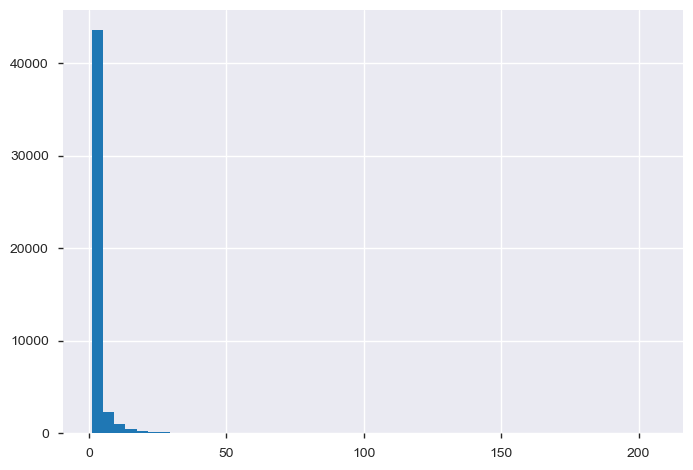

In [34]:
ratings_df['Rating_Count'].hist(bins=50)

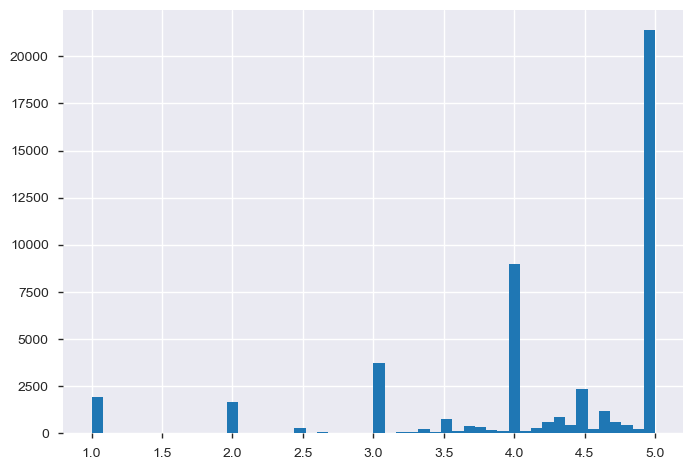

In [35]:
ratings_df['Rating'].hist(bins=50)

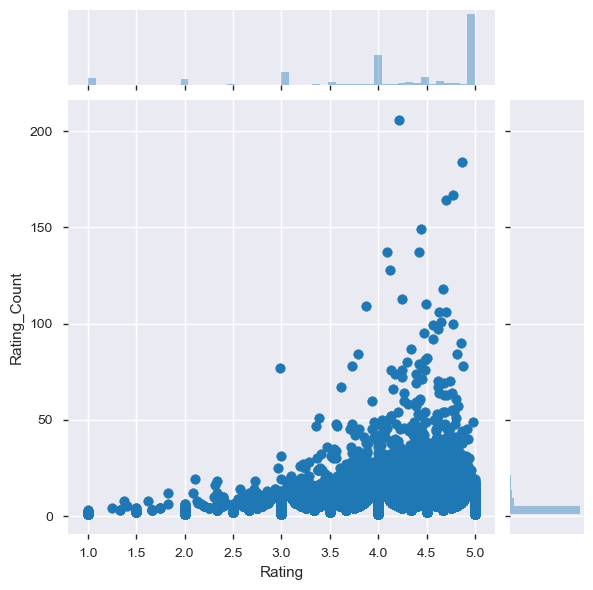

In [36]:
sns.jointplot(x='Rating',y='Rating_Count',data=ratings_df,alpha=1.0)

#### * Observe that in the above distribution most of the data is with rating 5 and number of rating count is within 50. Only few products were rated by more than 100 users.

### ===> 3a) List of top 10 products using weighted rating on Rating and Rating_Counts.

In [37]:
ratings_df.head(10)

,Rating,Rating_Count
ProductId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6
1400501520,5.000000,1
1400501776,4.500000,2
1400532620,3.000000,2
1400532655,3.833333,6


In [38]:
ratings_df.shape

(48190, 2)

In [39]:
ratings_df.sort_values('Rating_Count',ascending=False).head(10)

,Rating,Rating_Count
ProductId,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149
B008DWCRQW,4.094891,137
B00829THK0,4.416058,137
B002R5AM7C,4.125000,128
B004CLYEDC,4.669492,118


In [40]:
v = ratings_df['Rating_Count']
R = ratings_df['Rating']
C = ratings_df['Rating'].mean()
m = ratings_df['Rating_Count'].quantile(0.75)

In [41]:
ratings_df['Weighted_Rating'] = (((R*v)+(C*m))/(v+m))
ratings_df=ratings_df.sort_values('Weighted_Rating',ascending=False)

In [42]:
print("*** ** ******** ***** ** ******** *******")
print("Top 10 products based on weighted ratings")
print("*** ** ******** ***** ** ******** *******")
ratings_df.head(10)

*** ** ******** ***** ** ******** *******
Top 10 products based on weighted ratings
*** ** ******** ***** ** ******** *******


,Rating,Rating_Count,Weighted_Rating
ProductId,,,
B0052SCU8U,4.979592,49,4.949604
B000FQ2JLW,5.000000,19,4.925228
B00ISFNSBW,5.000000,18,4.921490
B000IJY8DS,5.000000,17,4.917358
B001TH7GUA,5.000000,17,4.917358
B00HZWJGS8,5.000000,17,4.917358
B005LDLP8W,5.000000,16,4.912767
B00HG1L334,5.000000,16,4.912767
B0012Y6HC8,5.000000,15,4.907635


### ===> 3b) List of top 10 products based on Rating and Rating_Counts using PANDAS Ranking.

In [43]:
rating_df_sort = ratings_df.sort_values(['Rating_Count', 'ProductId'], ascending = [0,1]).drop('Weighted_Rating', axis=1) 

In [44]:
rating_df_sort.head()

,Rating,Rating_Count
ProductId,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149


In [45]:
col1=rating_df_sort['Rating'].astype(str)
col2=rating_df_sort['Rating_Count'].astype(str)
rating_df_sort['Rank']=(col2+col1).astype(float).rank(method='first', ascending=False).astype(int)
rating_df_sort=rating_df_sort.sort_values('Rank')

In [46]:
print("*** ** ******** ***** ** ****** *** ************* ***** ****** *******")
print("Top 10 products based on Rating and Rating_Counts using PANDAS Ranking")
print("*** ** ******** ***** ** ****** *** ************* ***** ****** *******")
rating_df_sort.head(10)

*** ** ******** ***** ** ****** *** ************* ***** ****** *******
Top 10 products based on Rating and Rating_Counts using PANDAS Ranking
*** ** ******** ***** ** ****** *** ************* ***** ****** *******


,Rating,Rating_Count,Rank
ProductId,,,
B0088CJT4U,4.218447,206,1
B003ES5ZUU,4.864130,184,2
B000N99BBC,4.772455,167,3
B007WTAJTO,4.701220,164,4
B00829TIEK,4.436242,149,5
B00829THK0,4.416058,137,6
B008DWCRQW,4.094891,137,7
B002R5AM7C,4.125000,128,8
B004CLYEDC,4.669492,118,9


### 4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

### Note: subsetting the dataset to make is even denser (keeping the users only who has given 125 or more number of ratings) since Item-Based colabrative filtering gives memory error and not able to process the volumn of data.

In [47]:
user_ratings[user_ratings.values>=125].index

Index(['A5JLAU2ARJ0BO', 'ADLVFFE4VBT8', 'A3OXHLG6DIBRW8', 'A6FIAB28IS79',
       'A680RUE1FDO8B', 'A1ODOGXEYECQQ8', 'A36K2N527TXXJN', 'A2AY4YUOX2N1BQ',
       'AWPODHOB4GFWL', 'A25C2M3QF9G7OQ',
       ...
       'AI8EMB0HUC6Z5', 'A1TQZUSOU22E9M', 'A2UWPPU5GZLMQZ', 'A1U5IJHJK84S54',
       'A1VTCSCH8FFC76', 'A1P0JSFW184ZXJ', 'A1URXSRV6WDHVY', 'A24HWYHR28JJ7A',
       'A20DDH4NT6Q1E8', 'A2HRHF83I3NDGT'],
      dtype='object', name='UserId', length=155)

In [48]:
user_ratings_df=prod_ratings_df[prod_ratings_df.UserId.isin(user_ratings[user_ratings.values>=125].index)]

In [49]:
user_ratings_df.sample(10, random_state=1)

,UserId,ProductId,Rating
7457293,A22CW0ZHY3NJH8,B00DTZYHX4,5.0
1063031,A20DZX38KRBIT8,B000IZ8GKS,1.0
7144889,A1UQBFCERIP7VJ,B00BP5KOPA,4.0
2134530,A3U41ZL33SS92P,B001MBLBXQ,3.0
757101,A2NOW4U7W3F7RI,B000BKJZ9Q,5.0
4370338,A1F9Z42CFF9IAY,B004QK8FBG,2.0
3483923,ADLVFFE4VBT8,B003NVMHKY,3.0
315964,A2BMZRO0H7TFCS,B0000AE82C,3.0
7343830,A22CW0ZHY3NJH8,B00D1V2882,5.0
4274719,A6VXZ1EEPRTLV,B004MMEI0K,4.0


In [50]:
print('Number of users who have rated 125 or more items =', len(user_ratings_df))
print('Number of unique users in the final data = ', user_ratings_df['UserId'].nunique())
print('Number of unique products in the final data = ', user_ratings_df['ProductId'].nunique())

Number of users who have rated 125 or more items = 29586
Number of unique users in the final data =  155
Number of unique products in the final data =  16680


In [51]:
user_ratings_df.shape

(29586, 3)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
rating_train, rating_test=train_test_split(user_ratings_df, test_size = 0.3, random_state=1)

In [54]:
print('Shape of training dataset: ',rating_train.shape)
print('Shape of testing dataset: ',rating_test.shape)

Shape of training dataset:  (20710, 3)
Shape of testing dataset:  (8876, 3)


In [55]:
rating_train.head()

,UserId,ProductId,Rating
1798602,A11I1I9QLMAM1A,B0018O77Q2,5.0
1460428,AZMY6E8B52L2T,B000VX6XL6,5.0
2792480,AZ515FFZ7I2P7,B002QUZL10,4.0
2657406,A5JLAU2ARJ0BO,B002JSQ96K,5.0
4761080,ABQWMANK4AR63,B0057XC5C6,5.0


In [56]:
rating_test.head()

,UserId,ProductId,Rating
7457293,A22CW0ZHY3NJH8,B00DTZYHX4,5.0
1063031,A20DZX38KRBIT8,B000IZ8GKS,1.0
7144889,A1UQBFCERIP7VJ,B00BP5KOPA,4.0
2134530,A3U41ZL33SS92P,B001MBLBXQ,3.0
757101,A2NOW4U7W3F7RI,B000BKJZ9Q,5.0


### 5. Build Collaborative Filtering model.

In [57]:
user_ratings_df.groupby('UserId').size().sort_values(ascending=False)

UserId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A31N0XY2UTB25C    227
                 ... 
A2QRXQPHDMFCQV    137
A3S3R88HA0HZG3    137
AOMEH9W6LHC4S     136
A36A1ZYZH8568P    136
A5KMMY627T3W      136
A3R1WFO4KIUQXZ    134
AOEDWQLH2WKKW     132
A100WO06OQR8BQ    132
A2W9GX82SLKROQ    132
A1MRPX3RM48T2I    131
A2PSD2R9A1CXG7    131
A2R6RA8FRBS608    131
A2SKEQT0WTB954    131
AGOH8N902URMW     131
A1N

In [58]:
user_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29586 entries, 178 to 7824444
Data columns (total 3 columns):
UserId       29586 non-null object
ProductId    29586 non-null object
Rating       29586 non-null float64
dtypes: float64(1), object(2)
memory usage: 924.6+ KB


In [59]:
user_ratings_df.shape

(29586, 3)

In [60]:
print('Number of users who have rated 100 or more items =', len(user_ratings_df))
print('Number of unique users in the final data = ', user_ratings_df['UserId'].nunique())
print('Number of unique products in the final data = ', user_ratings_df['ProductId'].nunique())

Number of users who have rated 100 or more items = 29586
Number of unique users in the final data =  155
Number of unique products in the final data =  16680


### *5a) User based collaboration using cosine similarity matrix

In [61]:
user_matrix=user_ratings_df.pivot(index='UserId', columns='ProductId',values='Rating').fillna(0)

In [62]:
user_matrix.shape

(155, 16680)

In [63]:
user_matrix.iloc[:10,:10]

ProductId,0970407998,0972683275,1400501776,1400532655,1400699169,1685560148,7562434166,787988002X,8862936826,9043413585
UserId,,,,,,,,,,
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10ZFE6YE0UHW8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11I1I9QLMAM1A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DQZKRKTNF5E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A149RNR5RH19YY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A15QYHQH80W30L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A17BUUBOU0598B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A17HMM1M7T9PJ1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
user_similarity=1-pairwise_distances(user_matrix.values,metric='cosine')

In [65]:
user_similarity_df=pd.DataFrame(user_similarity)

In [66]:
user_similarity_df.shape

(155, 155)

In [67]:
user_similarity_df.head()

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,1.000000,0.026500,0.038377,0.000000,0.018543,0.000000,0.000000,0.018005,0.009417,0.000000,...,0.011288,0.017141,0.031369,0.009745,0.011094,0.027481,0.018316,0.028337,0.012131,0.016607
1,0.026500,1.000000,0.005535,0.008355,0.050595,0.005765,0.024516,0.002362,0.000000,0.008537,...,0.014499,0.008052,0.035817,0.001202,0.039901,0.059657,0.037643,0.056800,0.006878,0.048124
2,0.038377,0.005535,1.000000,0.009170,0.018706,0.000000,0.000000,0.048609,0.008658,0.019325,...,0.040381,0.033488,0.017199,0.008243,0.029326,0.046009,0.015650,0.068311,0.005898,0.036290
3,0.000000,0.008355,0.009170,1.000000,0.005443,0.000000,0.000000,0.009392,0.008922,0.011315,...,0.007687,0.014008,0.000000,0.018582,0.004722,0.005615,0.012284,0.010721,0.000000,0.000000
4,0.018543,0.050595,0.018706,0.005443,1.000000,0.000000,0.011783,0.011541,0.013705,0.022524,...,0.026449,0.015082,0.001400,0.006524,0.014545,0.021158,0.060753,0.048013,0.005601,0.082273


In [68]:
np.fill_diagonal(user_similarity,0)

In [69]:
user_similarity_df.head()

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,0.000000,0.026500,0.038377,0.000000,0.018543,0.000000,0.000000,0.018005,0.009417,0.000000,...,0.011288,0.017141,0.031369,0.009745,0.011094,0.027481,0.018316,0.028337,0.012131,0.016607
1,0.026500,0.000000,0.005535,0.008355,0.050595,0.005765,0.024516,0.002362,0.000000,0.008537,...,0.014499,0.008052,0.035817,0.001202,0.039901,0.059657,0.037643,0.056800,0.006878,0.048124
2,0.038377,0.005535,0.000000,0.009170,0.018706,0.000000,0.000000,0.048609,0.008658,0.019325,...,0.040381,0.033488,0.017199,0.008243,0.029326,0.046009,0.015650,0.068311,0.005898,0.036290
3,0.000000,0.008355,0.009170,0.000000,0.005443,0.000000,0.000000,0.009392,0.008922,0.011315,...,0.007687,0.014008,0.000000,0.018582,0.004722,0.005615,0.012284,0.010721,0.000000,0.000000
4,0.018543,0.050595,0.018706,0.005443,0.000000,0.000000,0.011783,0.011541,0.013705,0.022524,...,0.026449,0.015082,0.001400,0.006524,0.014545,0.021158,0.060753,0.048013,0.005601,0.082273


In [70]:
user_similarity_df.idxmax(axis=1)[:5]

0     11
1     68
2    101
3    118
4    154
dtype: int64

In [71]:
user_similarity_df.iloc[0:1, :20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0265,0.038377,0.0,0.018543,0.0,0.0,0.018005,0.009417,0.0,0.030577,0.064161,0.043002,0.032133,0.026609,0.015867,0.029349,0.010377,0.013353,0.022075


In [72]:
user_similarity_df.iloc[1:2, 55:75]

,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
1,0.002096,0.044304,0.025118,0.019899,0.0,0.060635,0.018404,0.016341,0.008375,0.039711,0.040723,0.026265,0.039288,0.066864,0.013198,0.018775,0.026496,0.008773,0.0,0.013779


In [73]:
user_ratings_df.iloc[0]

UserId       A17HMM1M7T9PJ1
ProductId        0970407998
Rating                    4
Name: 178, dtype: object

In [74]:
user_ratings_df.iloc[11]

UserId       ADLVFFE4VBT8
ProductId      9981719005
Rating                  3
Name: 5932, dtype: object

In [75]:
user_ratings_df[user_ratings_df.UserId=='A17HMM1M7T9PJ1'].merge(user_ratings_df[user_ratings_df.UserId=='ADLVFFE4VBT8'], on='ProductId', how='inner')

,UserId_x,ProductId,Rating_x,UserId_y,Rating_y
0,A17HMM1M7T9PJ1,B0053R0WWG,5.0,ADLVFFE4VBT8,3.0
1,A17HMM1M7T9PJ1,B005IMFX2K,5.0,ADLVFFE4VBT8,5.0
2,A17HMM1M7T9PJ1,B00EMHVVNM,4.0,ADLVFFE4VBT8,5.0


#### *Above shows rating pattern for similar users based on cosine similarities.

### *5b) Item based collaboration using cosine similarity matrix

In [76]:
product_matrix=user_ratings_df.pivot(index='ProductId', columns='UserId',values='Rating').fillna(0)

In [77]:
product_matrix.shape

(16680, 155)

In [78]:
product_matrix.iloc[:10,:10]

UserId,A100WO06OQR8BQ,A10ZFE6YE0UHW8,A11I1I9QLMAM1A,A11KZ906QD08C5,A12DQZKRKTNF5E,A149RNR5RH19YY,A15QYHQH80W30L,A17BUUBOU0598B,A17HMM1M7T9PJ1,A18FLOC8YQY0P8
ProductId,,,,,,,,,,
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400699169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1685560148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7562434166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787988002X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8862936826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
product_similarity=1-pairwise_distances(product_matrix.values,metric='cosine')

In [80]:
product_similarity_df=pd.DataFrame(product_similarity)

In [81]:
product_similarity_df.shape

(16680, 16680)

In [82]:
product_similarity_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16670,16671,16672,16673,16674,16675,16676,16677,16678,16679
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
np.fill_diagonal(product_similarity,0)

In [84]:
product_similarity_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16670,16671,16672,16673,16674,16675,16676,16677,16678,16679
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
def get_similar_products(pid, k):
    idx=user_ratings_df[user_ratings_df.ProductId==pid].index[0]
    user_ratings_df['similarity']=product_similarity_df.iloc[idx]
    top_k=user_ratings_df.sort_values(['similarity'],ascending=False)[0:k]
    return top_k

In [86]:
user_ratings_df[user_ratings_df.ProductId=='0970407998']

,UserId,ProductId,Rating
178,A17HMM1M7T9PJ1,0970407998,4.0


In [87]:
get_similar_products('0970407998', 5)

,UserId,ProductId,Rating,similarity
631,A3TAS1AG6FMBQW,0972683275,5.0,0.780869
178,A17HMM1M7T9PJ1,0970407998,4.0,0.000000
10745,A2NYK9KWFMJV4Y,B00000J1TX,5.0,0.000000
10902,A2NB2E5DXE319Z,B00000J1UB,5.0,0.000000
11018,A6FIAB28IS79,B00000J1UQ,5.0,0.000000


#### *Above shows top 5 similar products to a product based on cosine similarities.

### *5c) using KNNWithMeans

In [88]:
rating_train.head()

,UserId,ProductId,Rating
1798602,A11I1I9QLMAM1A,B0018O77Q2,5.0
1460428,AZMY6E8B52L2T,B000VX6XL6,5.0
2792480,AZ515FFZ7I2P7,B002QUZL10,4.0
2657406,A5JLAU2ARJ0BO,B002JSQ96K,5.0
4761080,ABQWMANK4AR63,B0057XC5C6,5.0


In [89]:
rating_train.shape

(20710, 3)

In [90]:
rating_test.shape

(8876, 3)

In [91]:
from surprise import KNNWithMeans, accuracy, Dataset, Reader
from surprise.model_selection.search import GridSearchCV

In [92]:
reader=Reader(rating_scale=(1, 5))
rating_train_ds=Dataset.load_from_df(rating_train[['UserId', 'ProductId', 'Rating']],reader=reader)

In [93]:
rating_train_ds.df.head()

,UserId,ProductId,Rating
1798602,A11I1I9QLMAM1A,B0018O77Q2,5.0
1460428,AZMY6E8B52L2T,B000VX6XL6,5.0
2792480,AZ515FFZ7I2P7,B002QUZL10,4.0
2657406,A5JLAU2ARJ0BO,B002JSQ96K,5.0
4761080,ABQWMANK4AR63,B0057XC5C6,5.0


In [94]:
param_grid={'k': [10, 20],
            'min_k': [1, 2, 3, 4, 5],
            'sim_options':{'name': ['cosine'],
                           'user_based': [True, False]
                          }
           }

knn_grid_cv=GridSearchCV(KNNWithMeans,
                         param_grid,
                         measures=['rmse'],
                         cv=3,
                         refit=True)

In [95]:
knn_grid_cv.fit(rating_train_ds)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [96]:
print(knn_grid_cv.best_score['rmse'])
print(knn_grid_cv.best_params['rmse'])

0.9705477201450549
{'k': 10, 'min_k': 5, 'sim_options': {'name': 'cosine', 'user_based': True}}


In [97]:
result_df = pd.DataFrame.from_dict(knn_grid_cv.cv_results)
result_df[['param_k', 'param_min_k', 'param_sim_options', 'mean_test_rmse', 'rank_test_rmse']]

,param_k,param_min_k,param_sim_options,mean_test_rmse,rank_test_rmse
0,10,1,"{'name': 'cosine', 'user_based': True}",1.001664,9
1,10,1,"{'name': 'cosine', 'user_based': False}",1.043698,20
2,10,2,"{'name': 'cosine', 'user_based': True}",0.971970,7
3,10,2,"{'name': 'cosine', 'user_based': False}",1.038768,14
4,10,3,"{'name': 'cosine', 'user_based': True}",0.970857,5
5,10,3,"{'name': 'cosine', 'user_based': False}",1.037788,12
6,10,4,"{'name': 'cosine', 'user_based': True}",0.970597,3
7,10,4,"{'name': 'cosine', 'user_based': False}",1.039135,17
8,10,5,"{'name': 'cosine', 'user_based': True}",0.970548,1
9,10,5,"{'name': 'cosine', 'user_based': False}",1.039183,18


In [98]:
print('KNNWithMeans RMSE for trainset is: ',knn_grid_cv.best_score['rmse'])

KNNWithMeans RMSE for trainset is:  0.9705477201450549


### *5d) using SVD (matrix factorization)

In [99]:
from surprise import SVD

In [100]:
param_grid = {'n_epochs': [5, 10, 15, 20, 25], 'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.3, 0.4, 0.6, 0.8, 1.0],
              'n_factors': [1, 2, 3, 4, 5]}

svd_grid_cv = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3,refit=True)

In [101]:
svd_grid_cv.fit(rating_train_ds)

In [102]:
print(svd_grid_cv.best_score['rmse'])
print(svd_grid_cv.best_score['mae'])

0.920328981654693
0.694467226380044


In [103]:
print(svd_grid_cv.best_params['rmse'])
print(svd_grid_cv.best_params['mae'])

{'n_epochs': 25, 'lr_all': 0.005, 'reg_all': 0.2, 'n_factors': 1}
{'n_epochs': 25, 'lr_all': 0.005, 'reg_all': 0.2, 'n_factors': 1}


In [104]:
result_df1 = pd.DataFrame.from_dict(svd_grid_cv.cv_results)
result_df1[['mean_test_rmse', 'rank_test_rmse', 'mean_test_mae', 'rank_test_mae', 'params', 'mean_fit_time', 'mean_test_time']]

,mean_test_rmse,rank_test_rmse,mean_test_mae,rank_test_mae,params,mean_fit_time,mean_test_time
0,0.941774,264,0.726130,263,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",0.300023,0.328203
1,0.941676,261,0.726085,261,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",0.367361,0.297289
2,0.941857,265,0.726215,265,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",0.215030,0.144188
3,0.941735,262,0.726117,262,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",0.108030,0.070676
4,0.941771,263,0.726196,264,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",0.110897,0.095680
5,0.942842,273,0.727628,273,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",0.086972,0.071063
6,0.942815,272,0.727698,274,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",0.080312,0.070866
7,0.942844,274,0.727599,272,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",0.088219,0.072423
8,0.943046,275,0.727778,275,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",0.102159,0.091630
9,0.942801,271,0.727550,271,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",0.092993,0.075320


In [105]:
print('SVD RMSE for trainset is: ',svd_grid_cv.best_score['rmse'])
print('SVD MAE for trainset is: ',svd_grid_cv.best_score['mae'])

SVD RMSE for trainset is:  0.920328981654693
SVD MAE for trainset is:  0.694467226380044


### 6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

#### *Prediction on testset with KNNWithMeans model

In [106]:
rating_test_ds=Dataset.load_from_df(rating_test[['UserId', 'ProductId', 'Rating']],reader=reader)

In [107]:
uid = str('A11I1I9QLMAM1A')  # raw user id
iid = str('B0018O77Q2')  # raw item id
pred = knn_grid_cv.predict(uid, iid)
pred

Prediction(uid='A11I1I9QLMAM1A', iid='B0018O77Q2', r_ui=None, est=4.496688741721854, details={'actual_k': 2, 'was_impossible': False})

In [108]:
knn_prediction=knn_grid_cv.test(rating_test_ds.construct_testset(rating_test_ds.raw_ratings))

In [109]:
print(accuracy.rmse(knn_prediction))

RMSE: 0.9772
0.977207244509935


#### *Prediction on testset with SVD model

In [110]:
uid = str('A11I1I9QLMAM1A')  # raw user id
iid = str('B0018O77Q2')  # raw item id
pred = svd_grid_cv.predict(uid, iid)
pred

Prediction(uid='A11I1I9QLMAM1A', iid='B0018O77Q2', r_ui=None, est=4.611781109275241, details={'was_impossible': False})

In [111]:
svd_prediction=svd_grid_cv.test(rating_test_ds.construct_testset(rating_test_ds.raw_ratings))

In [112]:
print(accuracy.rmse(svd_prediction))
print(accuracy.mae(svd_prediction))

RMSE: 0.9308
0.9308448005438815
MAE:  0.6980
0.6980021804669246


#### * RMSE is better for SVD when compared with KNNWithMeans, also SVD prediction estimate (est) is better for same user and product when compared with KNNWithMeans. 

### 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

#### * Top 5 recommendations thru popularity based recommender 

In [113]:
print("*** * ******** ***** ** ******** *******")
print("Top 5 products based on weighted ratings")
print("*** * ******** ***** ** ******** *******")
ratings_df.head(5)

*** * ******** ***** ** ******** *******
Top 5 products based on weighted ratings
*** * ******** ***** ** ******** *******


,Rating,Rating_Count,Weighted_Rating
ProductId,,,
B0052SCU8U,4.979592,49,4.949604
B000FQ2JLW,5.000000,19,4.925228
B00ISFNSBW,5.000000,18,4.921490
B000IJY8DS,5.000000,17,4.917358
B001TH7GUA,5.000000,17,4.917358


In [114]:
print("*** * ******** ***** ** ****** *** ************* ***** ****** *******")
print("Top 5 products based on Rating and Rating_Counts using PANDAS Ranking")
print("*** * ******** ***** ** ****** *** ************* ***** ****** *******")
rating_df_sort.head(5)

*** * ******** ***** ** ****** *** ************* ***** ****** *******
Top 5 products based on Rating and Rating_Counts using PANDAS Ranking
*** * ******** ***** ** ****** *** ************* ***** ****** *******


,Rating,Rating_Count,Rank
ProductId,,,
B0088CJT4U,4.218447,206,1
B003ES5ZUU,4.864130,184,2
B000N99BBC,4.772455,167,3
B007WTAJTO,4.701220,164,4
B00829TIEK,4.436242,149,5


#### *Top 5 products recommendation for each users in testset, using SVD model

In [115]:
from collections import defaultdict
def get_top_k(prediction, k):
    # Map the predictions to each user.
    top_k = defaultdict(list)
    for uid, iid, true_r, est, _ in prediction:
        top_k[uid].append((iid, est))
    # Sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_k.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_k[uid] = user_ratings[:k]
    return top_k

In [116]:
top_k=get_top_k(svd_prediction, 5)

In [117]:
for uid, user_ratings in top_k.items():
    print(uid, [iid for (iid, _) in user_ratings])

A22CW0ZHY3NJH8 ['B003ES5ZUU', 'B0041Q38NU', 'B00HFRWWAM', 'B00B50CEH6', 'B00DTZYHX4']
A20DZX38KRBIT8 ['B002TLTGM6', 'B001FA1O0O', 'B0074703CM', 'B001EYV9TM', 'B0012JCYPC']
A1UQBFCERIP7VJ ['B00CSDMWGW', 'B00JF0D7RE', 'B00EAR8S76', 'B00BB6DCUC', 'B00JWXTOIA']
A3U41ZL33SS92P ['B00BW6KCTU', 'B003CFATT2', 'B0013DXVYK', 'B007ZW7YEQ', 'B002LARRDK']
A2NOW4U7W3F7RI ['B0082E9K7U', 'B00DK2JQOQ', 'B004IK2EAW', 'B00HA4ORMQ', 'B00006RVPW']
A1F9Z42CFF9IAY ['B001V9KG0I', 'B0007TJ5AK', 'B00109Y2DQ', 'B007I5JT4S', 'B00DB9WCR6']
ADLVFFE4VBT8 ['B00B588HY2', 'B00ENZRS76', 'B0053R0WWG', 'B00CHH0JF0', 'B00L3YHF6O']
A2BMZRO0H7TFCS ['B00E0HITQ6', 'B0099SMFVQ', 'B00FPKDPZC', 'B002YU83YO', 'B003VANO7C']
A6VXZ1EEPRTLV ['B005IMFX2K', 'B00L2442H0', 'B003XN24GY', 'B00007B4DM', 'B0062EUE54']
A2QRXQPHDMFCQV ['B009HQCAPQ', 'B002HWRJY4', 'B00834SJSK', 'B001D8S9E2', 'B004NY9UUK']
A1NGFGBX2VCQS8 ['B000N99BBC', 'B00DVFLJDS', 'B000QUUFRW', 'B00BWHILCY', 'B0081N916W']
A1EKSETIBS9ETQ ['B00E3W15P0', 'B000M17AVO', 'B002HWRJBM',

### 8. Summarise your insights.

* Popularity-based recommender system is a non-personalised recommender system and these are based on product ratings and rating counts, which might not be suitable to the user. 

* Popularity based recommender systems recommends the same set of products, irrespective of the user’s preferences.

* Collaborative Filtering based model has recommended entirely different list based on the user preferences (rating history).

* Model-based Collaborative Filtering is a personalised recommender system; the recommendations are based on the past behaviour of the user and it is not dependent on any additional information.